# Interpolation

Interpolation allows you to find or create new points between a set of known points.

<img src="interpolation.png">
Taken from https://en.wikipedia.org/wiki/Bicubic_interpolation

## 1D nearest-neighbour interpolation

Having the known points $(x_0,y_0)$ and $(x_1,y_1)$, the value of a new $y$ for a new $x$ between $x_0$ and $x_1$ is:

\begin{align}
y=
\begin{cases}
    y_0, & \text{if } abs(x-x_0) <= abs(x-x_1)\\
    y1, & \text{otherwise}
\end{cases}
\end{align}

Example:

<img width="400" src="nearest_1d.png">
Taken from https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation

## 1D linear interpolation

Having the known points $(x_0,y_0)$ and $(x_1,y_1)$, the new point $(x,y)$ must be in the straight line between these points.

<img width="300" src="interpolation_linear1d.png">
Taken from https://en.wikipedia.org/wiki/Linear_interpolation

\begin{align}
\frac{y-y_0}{x-x_0} = \frac{y_1-y_0}{x_1-x_0}
\end{align}

Having $x$ and solving for $y$:

\begin{align}
y = y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}
\end{align}

## 1D polinomial interpolation

We must construct the model from $n$ pair of points, where $n$ is the order of the interpolation.

\begin{align}
p(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 + a_1 x + a_0. \qquad
\end{align}

You can represent it in its matricial form, in order to solve it (find the coefficients):

\begin{align}
\begin{bmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & \ldots & x_0 & 1 \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & \ldots & x_1 & 1 \\
\vdots & \vdots    & \vdots    &        & \vdots & \vdots \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & \ldots & x_n & 1
\end{bmatrix}
\begin{bmatrix} a_n \\ a_{n-1} \\ \vdots \\ a_0 \end{bmatrix}  =
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}
\end{align}

For example, the red points are known, and the blue line is the interpolation:

<img width="350" src="interpolation_poli1d.png">
Taken from https://en.wikipedia.org/wiki/Polynomial_interpolation

## 2D bilinear interpolation

You perform linear interpolation in $x$, and then in $y$.

<img width="320" src="interpolation_bilinear.png">

\begin{align}
f(R_1) \approx \frac{x_2-x}{x_2-x_1} f(Q_{11}) + \frac{x-x_1}{x_2-x_1} f(Q_{21})
\end{align}

\begin{align}
f(R_2) \approx \frac{x_2-x}{x_2-x_1} f(Q_{12}) + \frac{x-x_1}{x_2-x_1} f(Q_{22})
\end{align}

\begin{align}
f(P) \approx \frac{y_2-y}{y_2-y_1} f(R_1) + \frac{y-y_1}{y_2-y_1} f(R_2)
\end{align}

# Downsampling (Resize to a lower resolution)

When you change the size or resolution of an image, you need to interpolate to calculate the value of the new pixel position.

For example:

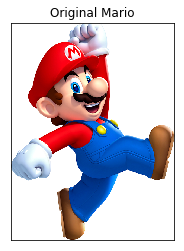

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

imgMario = cv2.imread('mario.png')
plt.imshow(imgMario[...,::-1])
plt.title('Original Mario'), plt.xticks([]), plt.yticks([])
plt.show()

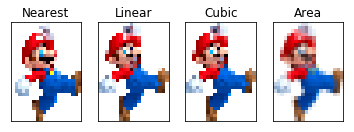

In [6]:
imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_NEAREST) 
plt.subplot(241)
plt.imshow(imgMario1[...,::-1])
plt.title('Nearest'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_LINEAR) 
plt.subplot(242)
plt.imshow(imgMario1[...,::-1])
plt.title('Linear'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_CUBIC) 
plt.subplot(243)
plt.imshow(imgMario1[...,::-1])
plt.title('Cubic'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_AREA) 
plt.subplot(244)
plt.imshow(imgMario1[...,::-1])
plt.title('Area'), plt.xticks([]), plt.yticks([])

plt.show()

# Transformations

Geometric transformations modify the spatial relationship between pixels in an image. Suppose an *input space* $(w, z)$ and an *output space* (x, y), that are coordinate systems.

A geometrical transformation maps a point from the *input space* to the *output space*:

\begin{align}
(x, y) = T[(w, z)]
\end{align}

And the inverse transformation:

\begin{align}
(w, z) = T^{-1}[(x, y)]
\end{align}

<img width="500" src="geo_trans.png">

For example:

\begin{align}
(x, y) = T[(w, z)] = (w/2, z/2)
\end{align}

\begin{align}
(w, z) = T^{-1}[(x, y)] = (2x, 2y)
\end{align}

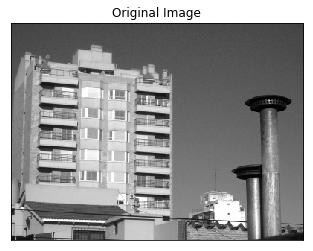

In [8]:
imgBuilding = cv2.imread('building.png',0)
rows,cols = imgBuilding.shape
plt.imshow(imgBuilding, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Isometry transformation

Rotation and translation:

\begin{align}
\begin{bmatrix}
    x' \\
    y' \\
\end{bmatrix}=
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta} \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
\end{bmatrix}+
\begin{bmatrix}
    t_1 \\
    t_2 \\
\end{bmatrix}
\end{align}

And more concise (homogeneous coordinates):

\begin{align}
\begin{bmatrix}
    x' \\
    y' \\
    1
\end{bmatrix}=
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta} & t_1\\
    \sin{\theta} & \cos{\theta} & t_2\\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    1
\end{bmatrix}
\end{align}

\begin{align}
\textbf{x'}=
\begin{bmatrix}
    \textbf{R} & \textbf{t}\\
    \textbf{0}^T & 1\\
\end{bmatrix}
\textbf{x}
\end{align}

Properties:

* $\textbf{R}$ is an orthogonal matrix.
* Euclidean distance is preserved
* Has three degrees of freedom; two for translation, and one for rotation


For $\theta=0$ (no rotation, only translation):

\begin{align}
\begin{bmatrix}
    x' \\
    y' \\
    1
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & t_1\\
    0 & 1 & t_2\\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    1
\end{bmatrix}
\end{align}

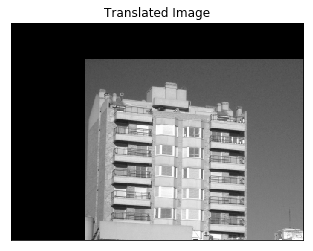

In [9]:
t_1 = 100
t_2 = 50
M = np.float32([[1,0,t_1],[0,1,t_2]])
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Translated Image'), plt.xticks([]), plt.yticks([])
plt.show()

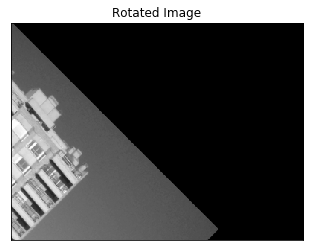

In [10]:
theta = np.radians(45)
t_1 = 0
t_2 = 0
M = np.float32([[np.cos(theta),-np.sin(theta),t_1],[np.sin(theta),np.cos(theta),t_2]])
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Rotated Image'), plt.xticks([]), plt.yticks([])
plt.show()

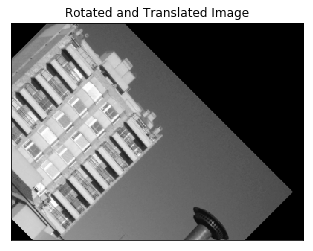

In [11]:
theta = np.radians(45)
t_1 = 100
t_2 = -50
M = np.float32([[np.cos(theta),-np.sin(theta),t_1],[np.sin(theta),np.cos(theta),t_2]])
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Rotated and Translated Image'), plt.xticks([]), plt.yticks([])
plt.show()

***Rotation from specific center:***

\begin{align}
M=
\begin{bmatrix}
    \alpha & \beta & (1-\alpha) \cdot center.x - \beta \cdot center.y\\
    -\beta & \alpha & \beta \cdot center.x + (1-\alpha) \cdot center.b\\
    0 & 0 & 1
\end{bmatrix}
\end{align}

That can be computed by the **cv2.getRotationMatrix2D** function:

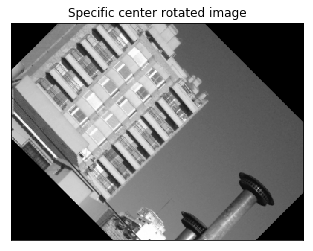

In [12]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45, 1)
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Specific center rotated image'), plt.xticks([]), plt.yticks([])
plt.show()

### Similarity transformation

With scale factor:
    
\begin{align}
\begin{bmatrix}
    x' \\
    y' \\
    1
\end{bmatrix}=
\begin{bmatrix}
    s\cos{\theta} & -s\sin{\theta} & t_1\\
    s\sin{\theta} & s\cos{\theta} & t_2\\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    1
\end{bmatrix}
\end{align}

\begin{align}
\textbf{x'}=
\begin{bmatrix}
    s\textbf{R} & \textbf{t}\\
    \textbf{0}^T & 1\\
\end{bmatrix}
\textbf{x}
\end{align}

Properties:

* $\textbf{R}$ is an orthogonal matrix.
* Similarity ratio (the ratio of two lengths) is preserved
* Has four degrees of freedom; two for translation, one for rotation, and one for scaling

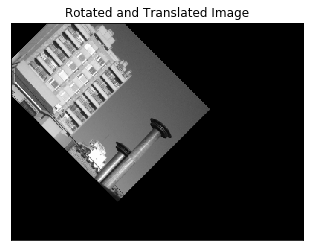

In [13]:
theta = np.radians(45)
t_1 = 100
t_2 = -50
s = 0.6
M = np.float32([[s*np.cos(theta),-s*np.sin(theta),t_1],[s*np.sin(theta),s*np.cos(theta),t_2]])
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Rotated and Translated Image'), plt.xticks([]), plt.yticks([])
plt.show()

And with the **cv2.getRotationMatrix2D** function:

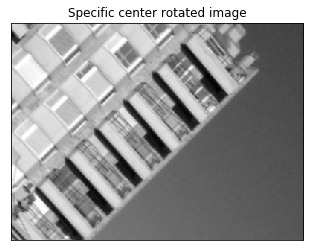

In [14]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45, 2)
imgBuilding1 = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.imshow(imgBuilding1, cmap = 'gray')
plt.title('Specific center rotated image'), plt.xticks([]), plt.yticks([])
plt.show()

### Affine transformation
    
\begin{align}
\begin{bmatrix}
    x' \\
    y' \\
    1
\end{bmatrix}=
\begin{bmatrix}
    a_{11} & a_{12} & t_x\\
    a_{21} & a_{22} & t_y\\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    1
\end{bmatrix}
\end{align}

\begin{align}
\textbf{x'}=
\begin{bmatrix}
    \textbf{A} & \textbf{t}\\
    \textbf{0}^T & 1\\
\end{bmatrix}
\textbf{x}
\end{align}

Properties:

* $\textbf{A}$ is a non‐singular matrix
* Ratio of lengths of parallel line segments is preserved
* Has six degrees of freedom; two for translation, one for rotation, one for scaling, one for scaling direction, and one for
scaling ratio

The **cv2.getAffineTransform** function needs three points from both *input* and *output* spaces to compute $\textbf{A}$.

<img width="500" src="affine.jpg">



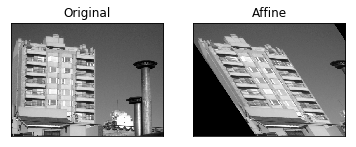

In [15]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[50,50],[200,50],[150,200]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(imgBuilding,M,(cols,rows))
plt.subplot(121)
plt.imshow(imgBuilding, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst, cmap = 'gray')
plt.title('Affine'), plt.xticks([]), plt.yticks([])
plt.show()